# Initiation

In [1]:
# To manipulate arrays
import numpy as np 
# To handle track DataFrames
import pandas as pd
# For working with x-arrays
import xarray as xr
# To import images
from skimage import io 
from skimage.io import imread
# For TrackPy
# To make plots
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()  
# For directories 
import os
import pathlib  # for working with windows paths
# For reloading a library when testing
# For deleting/reloading modules in another file for code testing
# Import trackArrayTools


current_dir = pathlib.Path().absolute()
croparray_dir = current_dir.parents[0].joinpath('croparray')
# Importing fish_analyses module
sys.path.append(str(croparray_dir))
import crop_array_tools as ca


# To work inline; change to %matplotlib notebook for interactive plotting
%matplotlib inline 
plt.style.use('dark_background')


# Directories

In [2]:
# Main directory
images_directory = current_dir.parents[0].joinpath('dataBase').joinpath('FISH_Analysis','GAPDH_Exon_Cy5_short') 

# Directories for images and database
image_2_dir = images_directory.joinpath('ROI001_XY1620755243_Z00_T0_merged.tif')
image_1_dir = images_directory.joinpath('ROI002_XY1620755646_Z00_T0_merged.tif')
database_dir =  current_dir.parents[0].joinpath('dataBase').joinpath('FISH_Analysis','dataframe_GAPDH_Exon_Cy5_short.csv')


# Loading images

In [3]:
# Reading  images as numpy arrays
image_1 = imread(str(image_1_dir))  # [Z,Y,X,C]
image_2 = imread(str(image_2_dir))  # [Z,Y,X,C]
image_2.shape

(23, 928, 624, 3)

In [4]:
# Creating an array for croparray with dimensions (fov, f = frame, z, y, x, ch)
image_concatenated = np.concatenate((image_1[...,np.newaxis],image_2[...,np.newaxis]),axis=4) # concatenating the two arrays
image_new_order= np.moveaxis(image_concatenated,4,0) # moving axis to change dim from [Z,Y,X,C,fov] to [fov,Z,Y,X,C]
image_for_croparray = np.expand_dims(image_new_order,axis=1) # adding a dimension for f =frame
image_for_croparray.shape   # The final array with format: (fov, f = frame, z, y, x, ch)

(2, 1, 23, 928, 624, 3)

# Loading dataframe

In [5]:
# Loading original dataframe
spots = pd.read_csv(database_dir) 
spots

,Unnamed: 0,image_id,cell_id,spot_id,nucleus_y,nucleus_x,nuc_area_px,cyto_area_px,cell_area_px,z,y,x,is_nuc,is_cluster,cluster_size,spot_type,is_cell_fragmented
0,0,0,0,0,154,484,14640,24893,39533,4,145,469,1,1,2,0,0
1,1,0,0,1,154,484,14640,24893,39533,5,111,507,1,1,2,0,0
2,2,0,0,2,154,484,14640,24893,39533,6,135,460,1,1,2,0,0
3,3,0,0,3,154,484,14640,24893,39533,6,200,460,1,1,2,0,0
4,4,0,0,4,154,484,14640,24893,39533,7,144,447,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,6323,1,17,27,519,21,4079,13896,15502,11,566,13,1,0,0,0,0
6324,6324,1,17,28,519,21,4079,13896,15502,6,459,6,1,0,0,0,0
6325,6325,1,17,29,519,21,4079,13896,15502,9,573,13,1,0,0,0,0
6326,6326,1,17,30,519,21,4079,13896,15502,7,609,1,0,0,0,0,0


In [6]:
# Dataframe for croparray
spots['f']= 0   # Adding a column with zeros for frame
# renaming some fields
spots.rename(columns={'x': 'xc','y': 'yc', 'z': 'zc','spot_id':'id', 'image_id': 'fov'}, inplace=True, errors='raise')
spots = spots[['fov','id','f','zc','yc','xc']]  
spots.head()

,fov,id,f,zc,yc,xc
0,0,0,0,4,145,469
1,0,1,0,5,111,507
2,0,2,0,6,135,460
3,0,3,0,6,200,460
4,0,4,0,7,144,447


# Creating a croparray

In [132]:
my_ca = ca.create_crop_array(image_for_croparray,spots,xy_pad=10)
my_ca

Original video dimensions:  (2, 1, 23, 928, 624, 3)
Padded video dimensions:  (2, 1, 23, 950, 646, 3)
Max # of spots per frame:  3792
Shape of numpy array to hold all crop intensity data:  (2, 3792, 1, 23, 21, 21, 3)
Shape of xc and yc numpy arrays:  (2, 3792, 1, 3)
Shape of extra my_layers numpy array:  (2, 2, 3792, 1)


/Users/luisaguilera/Desktop/croparray/croparray/crop_array_tools.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n'] = my_crops.cumcount() # Create a new column 'n' as a cumulative counter of spots per frame per fov


<xarray.Dataset>
Dimensions:  (fov: 2, n: 3792, t: 1, z: 23, y: 21, x: 21, ch: 3)
Coordinates:
  * fov      (fov) int64 0 1
  * n        (n) int16 0 1 2 3 4 5 6 7 ... 3785 3786 3787 3788 3789 3790 3791
  * t        (t) int64 0
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 13 14 15 16 17 18 19 20 21 22
  * y        (y) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * x        (x) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * ch       (ch) int64 0 1 2
Data variables:
    int      (fov, n, t, z, y, x, ch) int64 534 454 474 476 549 ... 0 0 0 0 0
    xc       (fov, n, t, ch) int64 480 480 480 518 518 518 471 ... 0 0 0 0 0 0 0
    yc       (fov, n, t, ch) int64 156 156 156 122 122 122 146 ... 0 0 0 0 0 0 0
    dx       int64 1
    dy       int64 1
    dz       int64 1
    dt       int64 1
    xy_pad   int64 10
    id       (fov, n, t) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 0.0 0.0 0.0 0.0 0.0
    zc       (fov, n, t) float64 4.0 5.0 6.0 6.0 7.0 8.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    name:     video_filename
    date:     video_date

In [8]:
my_ca.attrs

{'name': 'video_filename', 'date': 'video_date'}

In [142]:

#fov: 2, n: 3792, t: 1, z: 23, y: 21, x: 21, ch: 3
my_ca.sel(fov=1,ch=1,n=slice(20,30),t=0).int


<xarray.DataArray 'int' (n: 11, z: 23, y: 21, x: 21)>
array([[[[ 595,  566,  520, ...,  824,  613,  628],
         [ 844,  764,  493, ...,  571,  560,  493],
         [ 728,  854,  921, ...,  514,  604,  710],
         ...,
         [ 765,  663,  610, ...,  716,  592,  533],
         [ 809,  840,  771, ...,  795,  623,  471],
         [ 747,  561,  677, ...,  578,  502,  777]],

        [[ 925,  501,  631, ...,  439,  936,  879],
         [ 449,  449,  639, ...,  676,  676,  698],
         [ 553,  573,  424, ...,  492,  872,  579],
         ...,
         [ 657,  782, 1017, ...,  691,  436,  868],
         [ 851,  591,  735, ...,  622,  655,  572],
         [ 803,  879,  671, ...,  713,  901,  552]],

        [[ 744,  951,  725, ...,  664,  591,  849],
         [ 656,  712,  411, ...,  730,  599,  620],
         [ 545, 1107,  520, ...,  546,  543,  788],
         ...,
...
         ...,
         [ 655,  529,  699, ...,  534,  478,  630],
         [ 527,  787,  559, ...,  650,  628,  568],
         [ 567,  637,  502, ...,  612,  617,  524]],

        [[ 422,  675,  692, ...,  956,  531,  607],
         [ 476,  869,  486, ...,  691,  926,  363],
         [ 449,  587,  735, ...,  551,  477,  655],
         ...,
         [ 537,  522,  632, ...,  627,  541,  609],
         [ 439,  732,  571, ...,  579,  785,  740],
         [ 520,  546,  511, ...,  626,  465,  481]],

        [[ 709,  430,  624, ...,  533,  504,  616],
         [ 601,  547,  494, ...,  436,  688,  531],
         [ 666,  508,  428, ...,  630,  942,  449],
         ...,
         [ 938,  393,  693, ...,  537,  566,  425],
         [ 639,  576,  491, ...,  480, 1032,  460],
         [ 675,  570,  426, ...,  664,  548,  437]]]])
Coordinates:
    fov      int64 1
  * n        (n) int16 20 21 22 23 24 25 26 27 28 29 30
    t        int64 0
  * z        (z) int64 0 1 2 3 4 5 6 7 8 9 10 ... 13 14 15 16 17 18 19 20 21 22
  * y        (y) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
  * x        (x) int64 -10 -9 -8 -7 -6 -5 -4 -3 -2 -1 0 1 2 3 4 5 6 7 8 9 10
    ch       int64 1
Attributes:
    units:      intensity (a.u.)
    long_name:  intensity

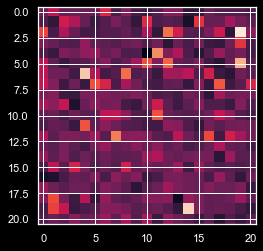

In [133]:
sp= 20
zval = my_ca.sel(fov=0,n=sp,t=0,ch=1).zc.values
plt.imshow(my_ca.sel(fov=0,ch=1,n=sp,t=0,z=zval).int)

In [56]:
my_ca.sel(fov=1,ch=[0,1,2],n=slice(1,10)).int.shape


(10, 1, 23, 11, 11, 3)

In [134]:
crop_array = ca.montage(my_ca, row = 'z', col = 'n').int.sel(ch=1)
crop_array.shape

(2, 1, 483, 79632)

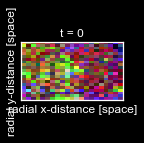

In [140]:
# Plot one of the crops over time to test
best_z = ca.best_z_proj(my_ca, ref_ch=1, disk_r=3, roll_n=3)
best_z.where(my_ca.id==0).max('n').sel(fov=0).plot.imshow(col='t',rgb='ch',col_wrap=10,robust=True,xticks=[],yticks=[],size=1.5)

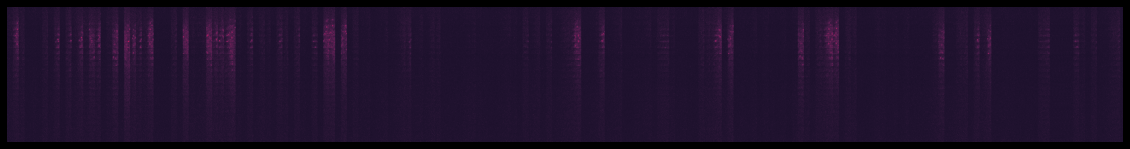

In [135]:
# Plotting
f = plt.figure(figsize=(20,15))
ax = plt.gca()
plt.imshow(crop_array[1,0,:,0:4000])
plt.grid(False)
plt.axis('off')
plt.show()

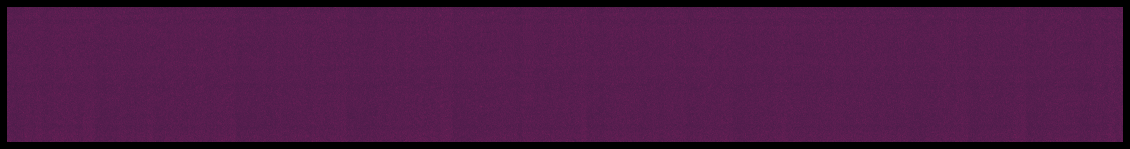

In [136]:
# Plotting
f = plt.figure(figsize=(20,15))
ax = plt.gca()
plt.imshow(crop_array[0,0,:,0:4000])
plt.grid(False)
plt.axis('off')
plt.show()